# Explore here

Objetivo del ejercicio con ML REGRESION LINEAL ES:
Predecir el costo del seguro médico (campo: charges: variable dependiente) en función de variables fisiológicas y de estilo de vida de los clientes.



Hipotesis:

El costo del seguro médico de una persona depende principalmente de si fuma o no, su edad y su índice de masa corporal (BMI).
También pueden influir en menor medida su sexo, número de hijos y región geográfica.

In [1]:
# Celda 1: Cargar librerías y dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset desde la URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
df = pd.read_csv(url)

# Vista rápida de los primeros datos
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.head(25)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


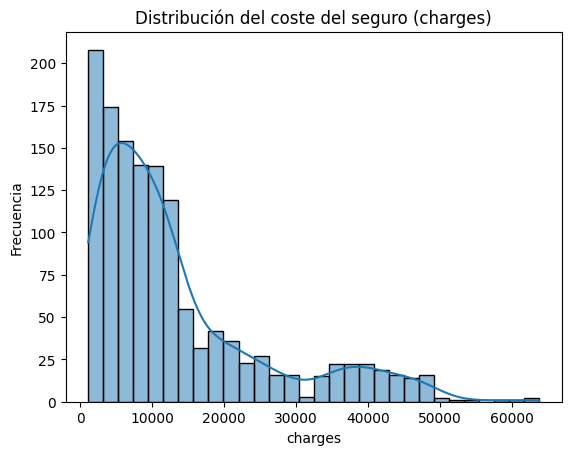

In [5]:
sns.histplot(df['charges'], kde=True)
plt.title("Distribución del coste del seguro (charges)")
plt.xlabel("charges")
plt.ylabel("Frecuencia")
plt.show()


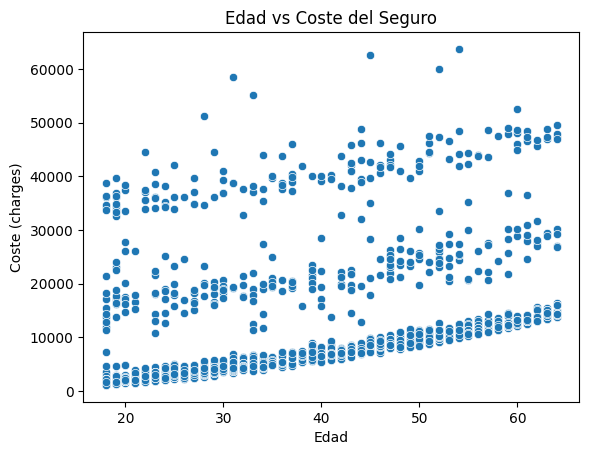

In [6]:
sns.scatterplot(x='age', y='charges', data=df)
plt.title("Edad vs Coste del Seguro")
plt.xlabel("Edad")
plt.ylabel("Coste (charges)")
plt.show()


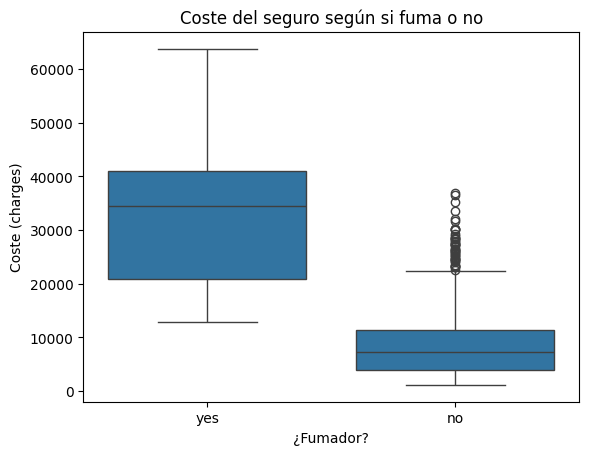

In [7]:
# Celda 6: Coste del seguro según si la persona fuma o no
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Coste del seguro según si fuma o no")
plt.xlabel("¿Fumador?")
plt.ylabel("Coste (charges)")
plt.show()


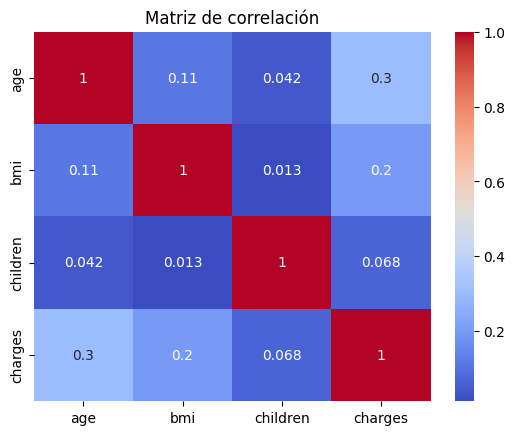

In [8]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


Variable	Relevancia observada

AGE:Correlación moderada (0.3)

BMI: Correlación baja (0.2), pero puede influir en combinación (ej. con smoker)

CHILDREN: Correlación muy baja

SMOKER:	Efecto muy fuerte.

SEX: Aún no explorado visualmente, pero podria tener algun impacto.

REGION: Sin evidencia clara de impacto fuerte.

Conclusion del analisis EDA:

a. No hay datos faltantes.

b. smoker, age, bmi parecen las variables más importantes.

c. Variables categóricas (sex, smoker, region).

In [9]:
from sklearn.model_selection import train_test_split

df_encoded = pd.get_dummies(df, drop_first=True) 

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensiones X_train:", X_train.shape)
print("Dimensiones X_test:", X_test.shape)

Dimensiones X_train: (1070, 8)
Dimensiones X_test: (268, 8)


In [10]:
from sklearn.linear_model import LinearRegression

modelo_lineal = LinearRegression()

modelo_lineal.fit(X_train, y_train)

coeficientes = pd.Series(modelo_lineal.coef_, index=X_train.columns)
print("Coeficientes del modelo:")
print(coeficientes)

Coeficientes del modelo:
age                   256.975706
bmi                   337.092552
children              425.278784
sex_male              -18.591692
smoker_yes          23651.128856
region_northwest     -370.677326
region_southeast     -657.864297
region_southwest     -809.799354
dtype: float64


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = modelo_lineal.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE (Error absoluto medio): ${mae:.2f}")
print(f"MSE (Error cuadrático medio): {mse:.2f}")
print(f"RMSE (Raíz del MSE): {rmse:.2f}")
print(f"R² (Coef. de determinación): {r2:.4f}")


MAE (Error absoluto medio): $4181.19
MSE (Error cuadrático medio): 33596915.85
RMSE (Raíz del MSE): 5796.28
R² (Coef. de determinación): 0.7836


Estas variables aportan poco o nada:

Variable	Razón para eliminar
sex_male	Coeficiente muy cercano a 0
region_* (3 vars)	Coeficientes negativos pero pequeños
children	Correlación baja, impacto leve

In [12]:
X_reducido = df_encoded[['age', 'bmi', 'smoker_yes']]
y = df_encoded['charges']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reducido, y, test_size=0.2, random_state=42)

modelo_reducido = LinearRegression()
modelo_reducido.fit(X_train_r, y_train_r)

y_pred_r = modelo_reducido.predict(X_test_r)

mae_r = mean_absolute_error(y_test_r, y_pred_r)
mse_r = mean_squared_error(y_test_r, y_pred_r)
rmse_r = np.sqrt(mse_r)
r2_r = r2_score(y_test_r, y_pred_r)

print(f"[Modelo Reducido]")
print(f"MAE: ${mae_r:.2f}")
print(f"MSE: {mse_r:.2f}")
print(f"RMSE: {rmse_r:.2f}")
print(f"R²: {r2_r:.4f}")

[Modelo Reducido]
MAE: $4260.56
MSE: 34512843.88
RMSE: 5874.76
R²: 0.7777


In [13]:
from numpy import log, exp

df_encoded['log_charges'] = np.log(df_encoded['charges'])

X_log = df_encoded[['age', 'bmi', 'smoker_yes']]
y_log = df_encoded['log_charges']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

modelo_log = LinearRegression()
modelo_log.fit(X_train_log, y_train_log)

y_pred_log = modelo_log.predict(X_test_log)

y_test_exp = np.exp(y_test_log)
y_pred_exp = np.exp(y_pred_log)


mae_log = mean_absolute_error(y_test_exp, y_pred_exp)
mse_log = mean_squared_error(y_test_exp, y_pred_exp)
rmse_log = np.sqrt(mse_log)
r2_log = r2_score(y_test_exp, y_pred_exp)


print(f"[Modelo con log(charges)]")
print(f"MAE: ${mae_log:.2f}")
print(f"MSE: {mse_log:.2f}")
print(f"RMSE: {rmse_log:.2f}")
print(f"R²: {r2_log:.4f}")


[Modelo con log(charges)]
MAE: $4215.21
MSE: 73217990.28
RMSE: 8556.75
R²: 0.5284


Voy a intentar a dividir el data set por grupo para ver si mejora el modelo general y el reducido( que para este caso fue peor!!!)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

cluster_vars = df_encoded[['age', 'bmi', 'smoker_yes']]

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_vars)

kmeans = KMeans(n_clusters=2, random_state=42)
df_encoded['cluster'] = kmeans.fit_predict(cluster_scaled)

print(df_encoded['cluster'].value_counts())

cluster
0    673
1    665
Name: count, dtype: int64


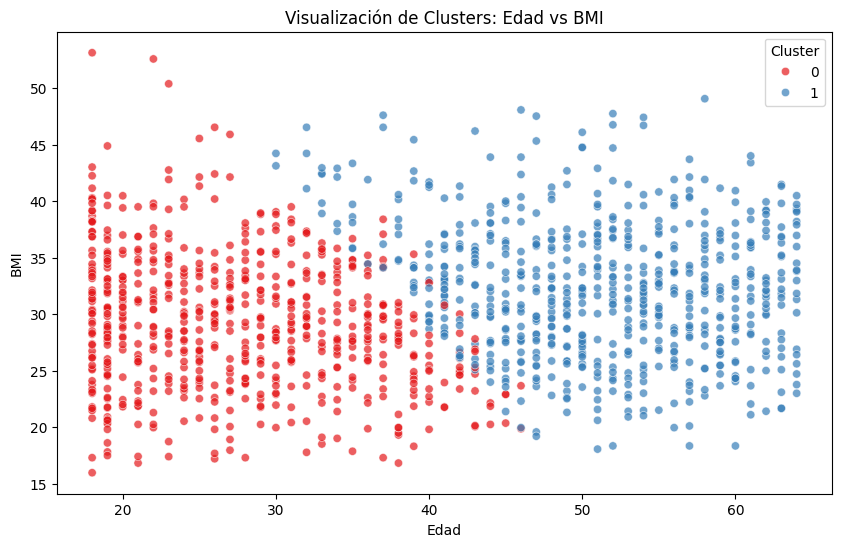

In [15]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='age', y='bmi',
    hue='cluster',
    data=df_encoded,
    palette='Set1',
    alpha=0.7
)

plt.title("Visualización de Clusters: Edad vs BMI")
plt.xlabel("Edad")
plt.ylabel("BMI")
plt.legend(title="Cluster")
plt.show()

In [16]:
def entrenar_por_cluster(df, cluster_id):
    subset = df[df['cluster'] == cluster_id]
    
    X = subset[['age', 'bmi', 'smoker_yes']]
    y = subset['charges']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    
    y_pred = modelo.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"📦 Resultados para Cluster {cluster_id}")
    print(f"MAE: ${mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}\n")
entrenar_por_cluster(df_encoded, cluster_id=0)
entrenar_por_cluster(df_encoded, cluster_id=1)

📦 Resultados para Cluster 0
MAE: $4228.64
RMSE: 5959.97
R²: 0.7605

📦 Resultados para Cluster 1
MAE: $3843.32
RMSE: 5866.32
R²: 0.7616

